# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [100]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [102]:
df = pd.read_csv('/content/drive/MyDrive/ML PER ESAME/power_demand_vs_temperature.csv')
display(df)

,date,demand,temp
0,2015-01-01,1.736065,1.7
1,2015-01-02,1.831672,2.2
2,2015-01-03,1.714934,14.4
3,2015-01-04,1.628577,15.6
4,2015-01-05,2.045394,0.0
...,...,...,...
1091,2017-12-27,1.983683,-9.4
1092,2017-12-28,2.001531,-10.0
1093,2017-12-29,1.940514,-7.8
1094,2017-12-30,1.909027,-7.8


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [103]:
df = df.set_index('date')
display(df)

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0
...,...,...
2017-12-27,1.983683,-9.4
2017-12-28,2.001531,-10.0
2017-12-29,1.940514,-7.8


### Explore the dataset and check for missing values


In [104]:
df.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [105]:
df.shape[0] - df.dropna().shape[0]

0

### Create X and y 

In [106]:
X = df.drop("demand", axis=1)
y = df['demand']

print(X.shape,y.shape)

(1096, 1) (1096,)


### Plot the distribution



<function matplotlib.pyplot.show(*args, **kw)>

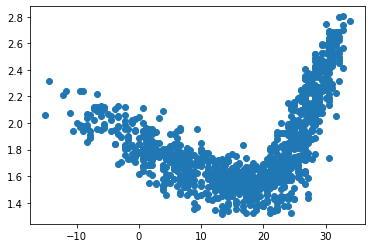

In [107]:
plt.scatter(X,y)
plt.show

### Divide the dataset in train and test splits

In [108]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state = 1,train_size=0.7)
print(Xtrain.shape,Xtest.shape)

(767, 1) (329, 1)


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [109]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def f_test(y_true, y_pred, n_var, n_obs, sn=.95):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SST = np.sum((y_true-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE 
    MST = SST / DFT
    F = MSM / MSE
    # f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p

def print_eval(X, y, model):
    pred = model.predict(X)
    F, p = f_test(y, pred, X.shape[1], X.shape[0])
    print(" Mean squared error: \t{:.5}".format(mean_squared_error(y,pred)))
    print(" r2 score: \t\t{:.5}".format(r2_score(y,pred)))
    print(" f-statistic: \t\t{:.5}".format(F))
    print(" p-value: \t\t{:.5}".format(p))
    return mean_squared_error(pred, y), r2_score(pred, y), F, p



## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [110]:
model = LinearRegression()
model.fit(Xtrain,ytrain)
metricsLinear = print_eval(Xtest,ytest,model)


 Mean squared error: 	0.09622
 r2 score: 		0.058542
 f-statistic: 		62.788
 p-value: 		3.6526e-14


#### Visualize the prediction of the model 

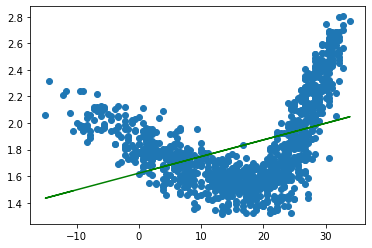

In [111]:
predicted  = model.predict(X)
plt.scatter(X,y)
plt.plot(X,predicted,color='green')
plt.show()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [112]:
pol_grade2 = PolynomialFeatures(2,include_bias=False)
X_poly = pol_grade2.fit_transform(Xtrain)
model = LinearRegression()
model.fit(X_poly, ytrain)

LinearRegression()

In [113]:
metrics2 = print_eval(pol_grade2.transform(Xtest), ytest, model)

 Mean squared error: 	0.034258
 r2 score: 		0.66481
 f-statistic: 		364.59
 p-value: 		1.1102e-16


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


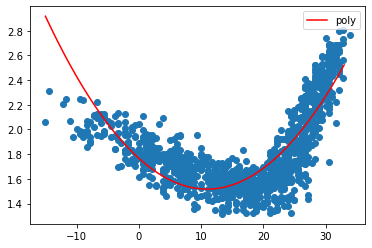

In [114]:
pred = model.predict(pol_grade2.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)),pred, label = "poly",color="red")
plt.legend()
plt.scatter(X,y)
plt.plot();

## Third experiment

#### Polynomial degree = 3

In [115]:
pol_grade3 = PolynomialFeatures(3,include_bias=False)
X_poly = pol_grade3.fit_transform(Xtrain)
model = LinearRegression()
model.fit(X_poly, ytrain)

LinearRegression()

In [116]:
metrics3 = print_eval(pol_grade3.transform(Xtest), ytest, model)

 Mean squared error: 	0.023066
 r2 score: 		0.77432
 f-statistic: 		386.19
 p-value: 		1.1102e-16


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


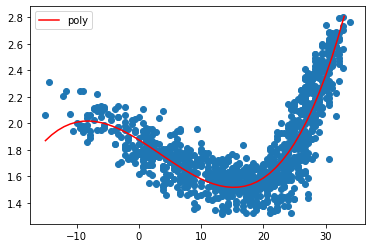

In [117]:
pred3 = model.predict(pol_grade3.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)),pred3, label = "poly",color="red")
plt.legend()
plt.scatter(X,y)
plt.plot();

## Fourth experiment
### Polynomial degree = 4

In [118]:
pol_grade4 = PolynomialFeatures(3,include_bias=False)
X_poly = pol_grade4.fit_transform(Xtrain)
model = LinearRegression()
model.fit(X_poly, ytrain)

LinearRegression()

In [119]:
metrics4 = print_eval(pol_grade4.transform(Xtest), ytest, model)

 Mean squared error: 	0.023066
 r2 score: 		0.77432
 f-statistic: 		386.19
 p-value: 		1.1102e-16


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


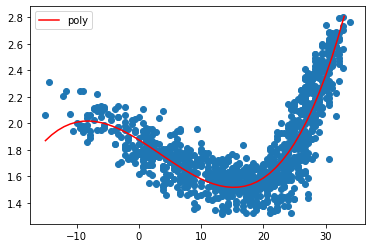

In [120]:
pred3 = model.predict(pol_grade4.transform((np.arange(min(X.temp), max(X.temp))).reshape(-1,1)))
plt.plot(np.arange(min(X.temp), max(X.temp)),pred3, label = "poly",color="red")
plt.legend()
plt.scatter(X,y)
plt.plot();

## Compare the performance of the four models

In [123]:
results = pd.DataFrame({'Linear': metricsLinear, 'grade2': metrics2, 'grade3': metrics3, 'grade4':metrics4},index = ['MSE','r2 score','f-statistic','p-value'])
results

,Linear,grade2,grade3,grade4
MSE,9.621971e-02,3.425754e-02,2.306556e-02,2.306556e-02
r2 score,-4.234015e+00,5.529229e-01,7.191596e-01,7.191596e-01
f-statistic,6.278755e+01,3.645913e+02,3.861889e+02,3.861889e+02
p-value,3.652634e-14,1.110223e-16,1.110223e-16,1.110223e-16
